In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics
import math
import seaborn as sns

In [81]:
from pylab import rcParams
rcParams['figure.figsize'] = 9,5

# 1. Загрузить датасет по url

In [82]:
import ssl
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

Более подробно о датасете можно прочитать по данной ссылке или по ссылке в kaggle

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.

Country (region) Name of the country.
Ladder Cantril Ladder is a measure of life satisfaction.
SD of Ladder Standard deviation of the ladder.
Positive affect Measure of positive emotion.
Negative affect Measure of negative emotion.
Social support The extent to which Social support contributed to the calculation of the Happiness Score.
Freedom The extent to which Freedom contributed to the calculation of the Happiness Score.
Corruption The extent to which Perception of Corruption contributes to Happiness Score.
Generosity The extent to which Generosity contributed to the calculation of the Happiness Score.
Log of GDP per capita The extent to which GDP contributes to the calculation of the Happiness Score.
Healthy life expectancy The extent to which Life expectancy contributed to the calculation of the Happiness Score.

# 2. Посмотреть первые несколько рядов таблицы

In [83]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


3. Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

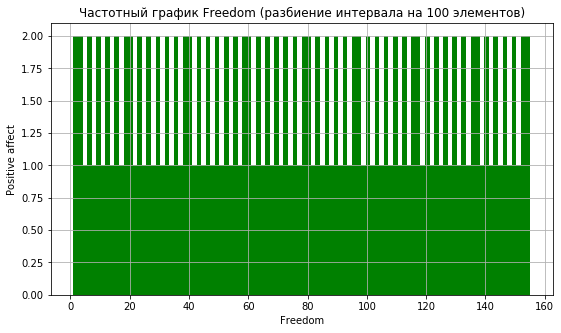

In [84]:
n, bins, patches = plt.hist(df['Freedom'], 100, facecolor='g')
plt.xlabel('Freedom')
plt.ylabel('Positive affect')
plt.title('Частотный график Freedom (разбиение интервала на 100 элементов)')
plt.grid(True)
plt.show()

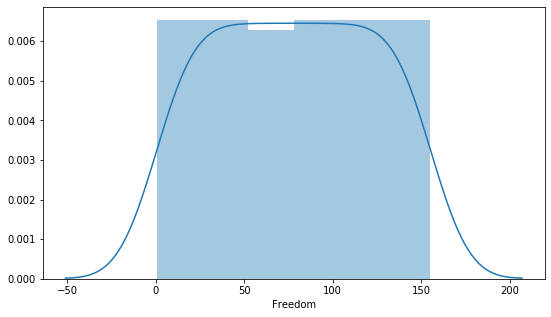

In [98]:
sns_plot1 = sns.distplot(df_new['Freedom'])
fig1 = sns_plot1.get_figure()

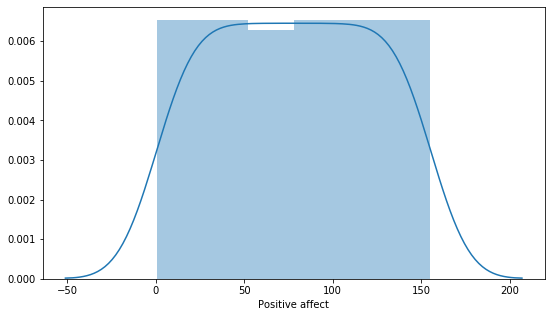

In [99]:
sns_plot2 = sns.distplot(df_new['Positive affect'])
fig2 = sns_plot2.get_figure()

# 4. Найти медиану, моду, математическое ожидание, стандартное отклонение, дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

Ответ: Равномерное распределение

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
Country (region)           156 non-null object
Ladder                     156 non-null int64
SD of Ladder               156 non-null int64
Positive affect            155 non-null float64
Negative affect            155 non-null float64
Social support             155 non-null float64
Freedom                    155 non-null float64
Corruption                 148 non-null float64
Generosity                 155 non-null float64
Log of GDP
per capita      152 non-null float64
Healthy life
expectancy    150 non-null float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.5+ KB


In [88]:
df[df['Freedom'].isnull()]

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
28,Qatar,29,86,NaN,NaN,NaN,NaN,NaN,NaN,1.0,43.0


In [100]:
df_new = df[~df['Freedom'].isnull()]

In [111]:
# математическое ожидание (среднее значение)
statistics.mean(df_new['Freedom'])

78.0

In [112]:
# медиана
statistics.median(df_new['Freedom'])

78.0

In [113]:
# минимум
min(df_new['Freedom'])

1.0

In [114]:
# максимум
max(df_new['Freedom'])

155.0

In [115]:
# размах
max(df_new['Freedom']) - min(df_new['Freedom'])

154.0

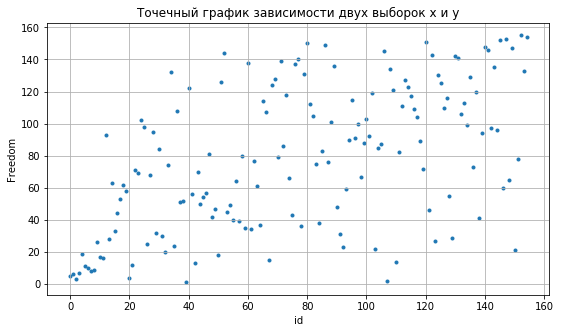

In [119]:
# разброс Freedom
y = df_new['Freedom']
plt.xlabel('id')
plt.ylabel('Freedom')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
x = [i for i in range(0, len(df_new['Freedom']))]
plt.scatter(x, y, marker='.')
plt.show()

In [116]:
# стандартное отклонение
statistics.pstdev(df_new['Freedom'])

44.74371464239419

In [117]:
# дисперсия
statistics.pvariance(df_new['Freedom'])

2002.0

In [107]:
# мода
statistics.mode(df_new['Freedom'])

StatisticsError: no unique mode; found 155 equally common values

Все значения моды уникальны

# 5. Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

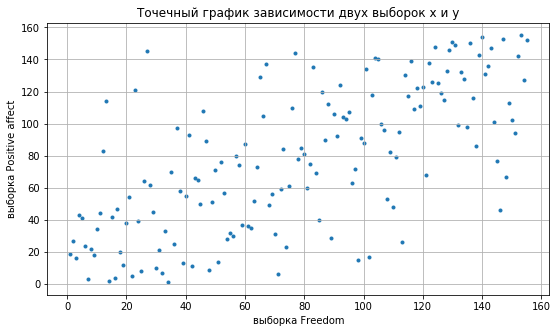

In [120]:
freedom = df_new['Freedom']
positive_affect = df_new['Positive affect']
plt.xlabel('выборка Freedom')
plt.ylabel('выборка Positive affect')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(freedom, positive_affect, marker='.')

Коэффициент корреляции Пирсона: 0.6817698430601656


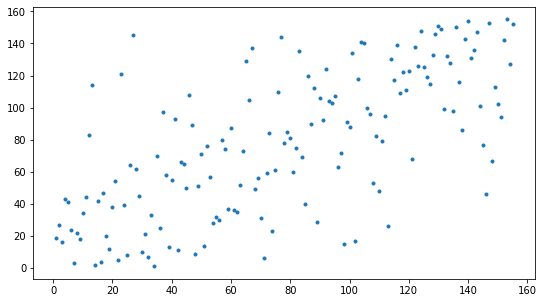

In [121]:
from scipy.stats import pearsonr
corr, p_value = pearsonr(freedom, positive_affect)
plt.scatter(freedom, positive_affect, marker='.')
print('Коэффициент корреляции Пирсона:', corr)

Коэффициент корреляции Пирсона близок к 1, прямая корреляция, между Freedom и Positive Affect наблюдается линейная связь.

# 6. Нормализовать данные колонки Freedom (централизация + масштабирование)

In [122]:
# центрирование
freedom = df_new['Freedom']
print(statistics.mean(freedom))

78.0


In [123]:
freedom_1 = freedom - statistics.mean(freedom)
print(statistics.mean(freedom_1))

0.0


In [124]:
min(freedom_1)

-77.0

In [125]:
max(freedom_1)

77.0

In [126]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

freedom_2 = min_max_scaler.fit_transform(np.array(freedom_1).reshape(-1, 1))
print(min(freedom_2))
print(max(freedom_2))

[-1.]
[1.]


(array([16., 15., 16., 15., 15., 16., 15., 16., 15., 16.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

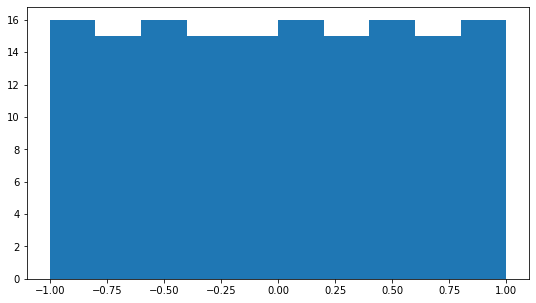

In [127]:
plt.hist(freedom_2)

# 7. Построить матрицу корреляций для всех колонок таблицы

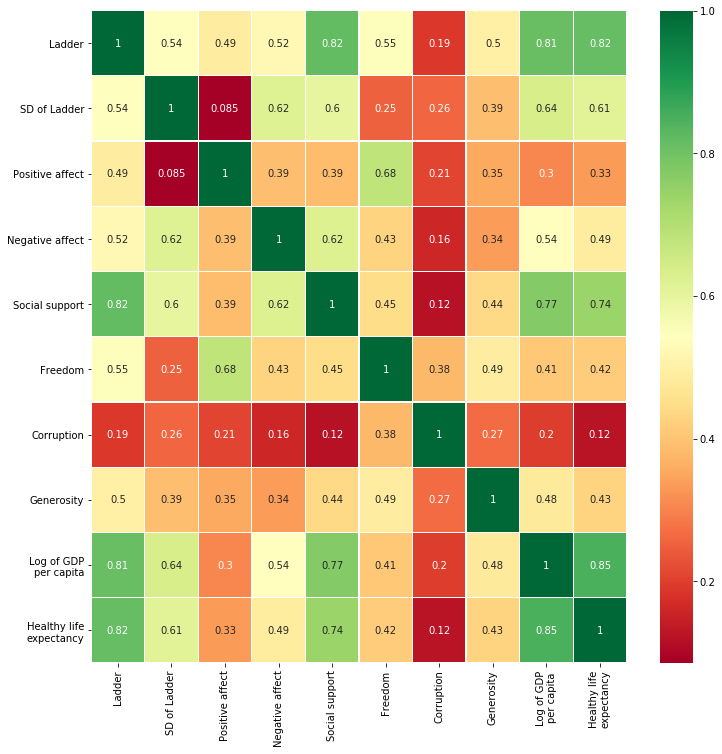

In [128]:
import seaborn as sns
sns.heatmap(df_new.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

# 8. Загрузить таблицу цен на авокадо:

In [129]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df_av=pd.read_csv(url)
df_av[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


In [130]:
df_av.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


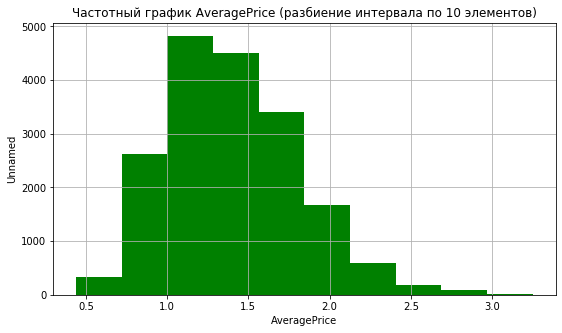

In [131]:
#Сделать частотный график колонки AveragePrice. Какое это распределение?
n, bins, patches = plt.hist(df_av['AveragePrice'], 10, facecolor='g')

plt.xlabel('AveragePrice')
plt.ylabel('Unnamed')
plt.title('Частотный график AveragePrice (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()

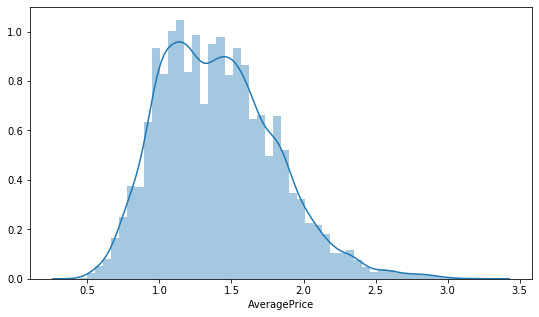

In [132]:
sns_plot3 = sns.distplot(df_av['AveragePrice'])
fig3 = sns_plot3.get_figure()

In [ ]:
Ответ: нормальное распределение

Найти корреляцию в следующих колонках:
колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

AveragePrice - средняя цена на один авокадо (авокадо продаются обычно в брикетах по несколько штук)
4046 - общее количество авокадо с кодом 4046
4225 - общее количество авокадо с кодом 4225
4770 - общее количество авокадо с кодом 4770

Коэффициент корреляции Пирсона для Average Price и 4046: -0.20831704848788477


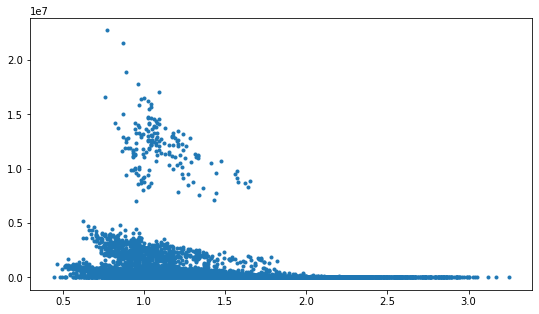

In [133]:
from scipy.stats import pearsonr
col_Average_Price = df_av['AveragePrice']
col_4046 = df_av['4046']
corr, p_value = pearsonr(col_Average_Price, col_4046)
plt.scatter(col_Average_Price, col_4046, marker='.')
print('Коэффициент корреляции Пирсона для Average Price и 4046:', corr)

Коэффициент корреляции Пирсона для Average Price и 4225: -0.17292777250933536


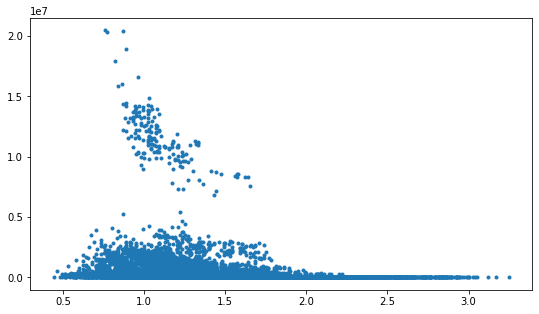

In [134]:
col_4225 = df_av['4225']
corr, p_value = pearsonr(col_Average_Price, col_4225)
plt.scatter(col_Average_Price, col_4225, marker='.')
print('Коэффициент корреляции Пирсона для Average Price и 4225:', corr)

Коэффициент корреляции Пирсона для Average Price и 4770: -0.1794459839797562


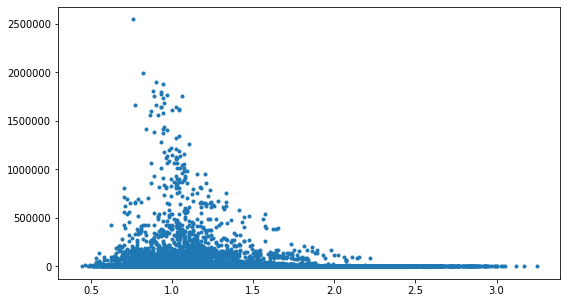

In [135]:
col_4770 = df_av['4770']
corr, p_value = pearsonr(col_Average_Price, col_4770)
plt.scatter(col_Average_Price, col_4770, marker='.')
print('Коэффициент корреляции Пирсона для Average Price и 4770:', corr)

Ответ: корреляция близка к -1, обратная корреляция